In [1]:
! pip install pyjobshop

  Using cached matplotlib-3.10.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
Using cached matplotlib-3.10.5-cp310-cp310-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.4 MB/s  0:00:01 eta 0:00:01
Using cached pillow-11.3.0-cp310-cp310-macosx_11_0_arm64.whl (4.7 M

In [9]:
NUM_MACHINES = 3

# Each job consists of a list of tasks. A task is represented
# by a list of tuples (processing_time, machine), denoting the eligible
# machine assignments and corresponding processing times.
data = [
    [  # Job with three tasks
        [(3, 0), (1, 1), (5, 2)],  # task with three eligible machine
        [(2, 0), (4, 1), (6, 2)],
        [(2, 0), (3, 1), (1, 2)],
    ],
    [
        [(2, 0), (3, 1), (4, 2)],
        [(1, 0), (5, 1), (4, 2)],
        [(2, 0), (1, 1), (4, 2)],
    ],
    [
        [(2, 0), (1, 1), (4, 2)],
        [(2, 0), (3, 1), (4, 2)],
        [(3, 0), (1, 1), (5, 2)],
    ],
]

In [10]:
from pyjobshop import Model

m = Model()

In [11]:
machines = [
    m.add_machine(name=f"Machine {idx}") for idx in range(NUM_MACHINES)
]

In [12]:
for job_idx, job_data in enumerate(data):
    print(f"job_idx {job_idx} / job_data {job_data}")

job_idx 0 / job_data [[(3, 0), (1, 1), (5, 2)], [(2, 0), (4, 1), (6, 2)], [(2, 0), (3, 1), (1, 2)]]
job_idx 1 / job_data [[(2, 0), (3, 1), (4, 2)], [(1, 0), (5, 1), (4, 2)], [(2, 0), (1, 1), (4, 2)]]
job_idx 2 / job_data [[(2, 0), (1, 1), (4, 2)], [(2, 0), (3, 1), (4, 2)], [(3, 0), (1, 1), (5, 2)]]


In [13]:
jobs = {}
tasks = {}

for job_idx, job_data in enumerate(data):
    job = m.add_job(name=f"Job {job_idx}")
    jobs[job_idx] = job

    for idx in range(len(job_data)):
        task_idx = (job_idx, idx)
        tasks[task_idx] = m.add_task(job, name=f"Task {task_idx}")

In [15]:
# There are two more things that we need to add to the model:
# Processing times of specific task and machine combinations must be set; and
# tasks of the same job must be processed in a given order.

for job_idx, job_data in enumerate(data):
    for idx, task_data in enumerate(job_data):
        task = tasks[(job_idx, idx)]

        for duration, machine_idx in task_data:
            machine = machines[machine_idx]
            m.add_mode(task, machine, duration)

    for idx in range(len(job_data) - 1):
        first = tasks[(job_idx, idx)]
        second = tasks[(job_idx, idx + 1)]
        m.add_end_before_start(first, second)

In [16]:
result = m.solve(display=True)
print(result)

PyJobShop v0.0.5

Solving an instance with:
    3 jobs
    3 resources
    └─ 3 machines
    9 tasks
    54 modes
    12 constraints
    └─ 12 end_before_start
    objective
    └─ weight_makespan=1

=============================== START SOLVER LOG ==============================

Starting CP-SAT solver v9.14.6206
Parameters: max_time_in_seconds: inf log_search_progress: true num_workers: 0
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0x853a26305fffbd61)
#Variables: 145 (#ints: 1 in objective) (129 primary variables)
  - 81 Booleans in [0,1]
  - 55 in [0,281474976710656]
  - 2 in [1][3][5]
  - 1 in [1][4,5]
  - 2 in [1,2][4]
  - 1 in [1,3]
  - 1 in [2][4][6]
  - 2 in [2,4]
#kExactlyOne: 9 (#literals: 54)
#kInterval: 39 (#enforced: 27)
#kLinMax: 7 (#expressions: 27)
#kLinear1: 270 (#enforced: 270)
#kLinear2: 12
#kNoOverlap: 3 (#intervals: 27, #optional: 27, #variable_sizes: 27)

Starting presolve at 0.01s
  2.86e-04s  0.00e+00d  [DetectDominanceRelat

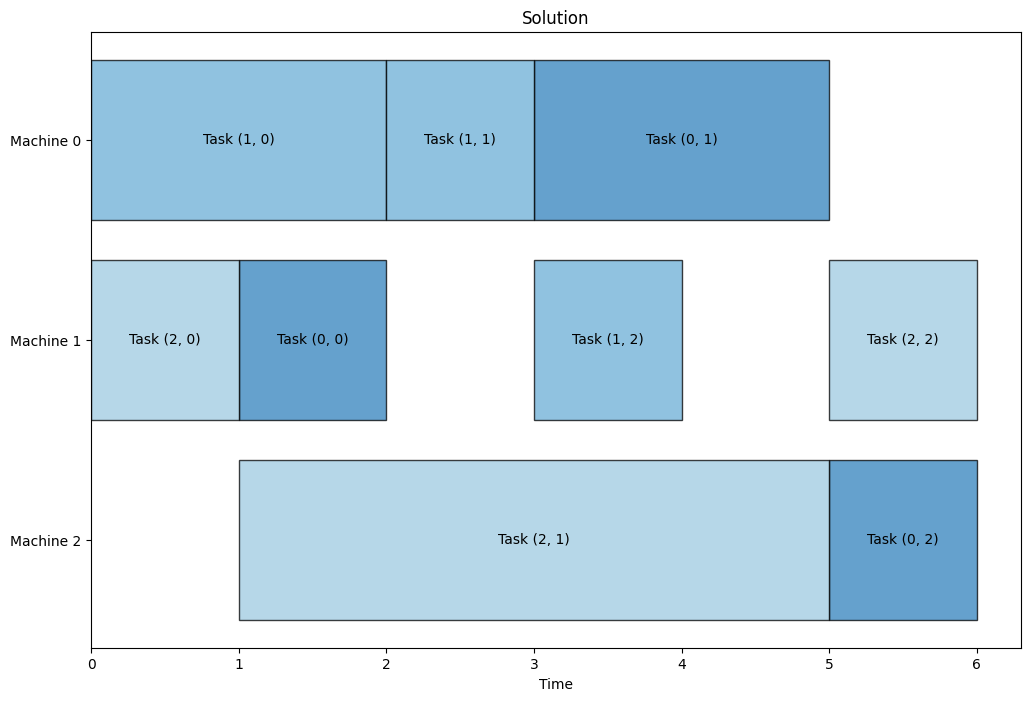

In [17]:
from pyjobshop.plot import plot_machine_gantt

plot_machine_gantt(result.best, m.data(), plot_labels=True)